In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-depression-machine-learning-challenge/sample_submission.csv
/kaggle/input/predicting-depression-machine-learning-challenge/train.csv
/kaggle/input/predicting-depression-machine-learning-challenge/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/train.csv')
test = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/test.csv')

submission = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/sample_submission.csv')

In [3]:
train

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [37]:
train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [4]:
test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [5]:
train[train.duplicated()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [6]:
test[test.duplicated()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness


In [7]:
train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

# **Numeric and Categorical values**

In [3]:
numerical = ['Age','Work Pressure','Job Satisfaction','Work/Study Hours','Financial Stress']
categorical =['Gender','City','Working Professional or Student','Profession','Sleep Duration','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']

train_numerical = train[numerical]
train_categorical =train[categorical]

In [97]:
train_numerical.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age,Work Pressure,Job Satisfaction,Work/Study Hours,Financial Stress
0,49.0,5.0,2.0,1.0,2.0
1,26.0,4.0,3.0,7.0,3.0
2,33.0,NaN,NaN,3.0,1.0
3,22.0,5.0,1.0,10.0,1.0
4,30.0,1.0,1.0,9.0,4.0


# **Missing Values in Train Dataset**

In [3]:
# Function to calculate missing values by column# Funct 
# from https://www.kaggle.com/parulpandey/starter-code-with-baseline
def missing_values_table(df):
        # Total missing values by column
        mis_val = df.isnull().sum()
        
        # Percentage of missing values by column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # build a table with the thw columns
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values for training data
missing_values_train = missing_values_table(train)
missing_values_train[:20].style.background_gradient(cmap='Reds')

Your selected dataframe has 20 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
Academic Pressure,112803,80.200000
Study Satisfaction,112803,80.200000
CGPA,112802,80.200000
Profession,36630,26.000000
Work Pressure,27918,19.800000
Job Satisfaction,27910,19.800000
Dietary Habits,4,0.000000
Financial Stress,4,0.000000
Degree,2,0.000000


In [8]:
# Calculate missing value percentage
missing_percent = (train.isnull().sum() / len(train)) * 100

missing_percent[missing_percent > 0]
print('Missing Percentages in Train datset')
print(missing_percent)

Missing Percentages in Train datset
id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.00

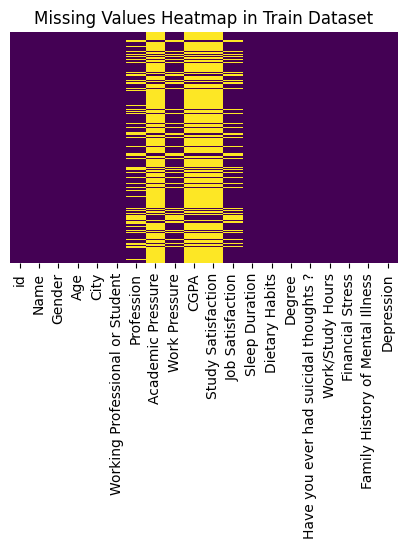

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(train)

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap in Train Dataset")
plt.show()


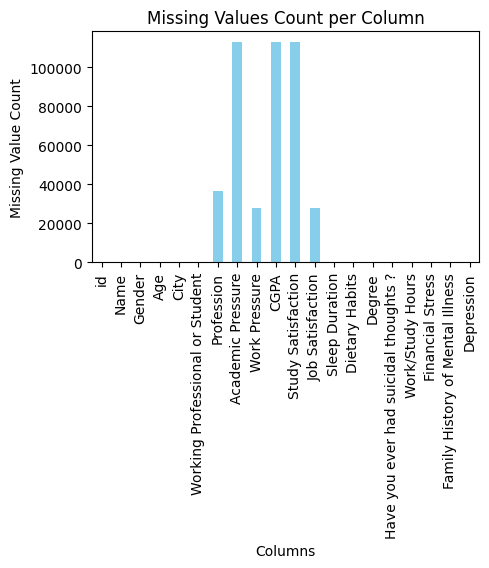

In [20]:
train.isnull().sum().plot(kind='bar', figsize=(5, 3), color='skyblue')
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.title("Missing Values Count per Column")
plt.show()

# **Missing Values in Test Dataset**

In [4]:
# Function to calculate missing values by column# Funct 
# from https://www.kaggle.com/parulpandey/starter-code-with-baseline
def missing_values_table(df):
        # Total missing values by column
        mis_val = df.isnull().sum()
        
        # Percentage of missing values by column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # build a table with the thw columns
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values for training data
missing_values_train = missing_values_table(test)
missing_values_train[:20].style.background_gradient(cmap='Reds')

Your selected dataframe has 19 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
CGPA,75034,80.000000
Academic Pressure,75033,80.000000
Study Satisfaction,75033,80.000000
Profession,24632,26.300000
Work Pressure,18778,20.000000
Job Satisfaction,18774,20.000000
Dietary Habits,5,0.000000
Degree,2,0.000000


In [8]:
test.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [23]:
# Calculate missing value percentage
missing_percent = (test.isnull().sum() / len(test)) * 100

missing_percent[missing_percent > 0]
print('Missing Percentages in Test datset')
print(missing_percent)

Missing Percentages in Test datset
id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.260128
Academic Pressure                        79.992537
Work Pressure                            20.019190
CGPA                                     79.993603
Study Satisfaction                       79.992537
Job Satisfaction                         20.014925
Sleep Duration                            0.000000
Dietary Habits                            0.005330
Degree                                    0.002132
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000

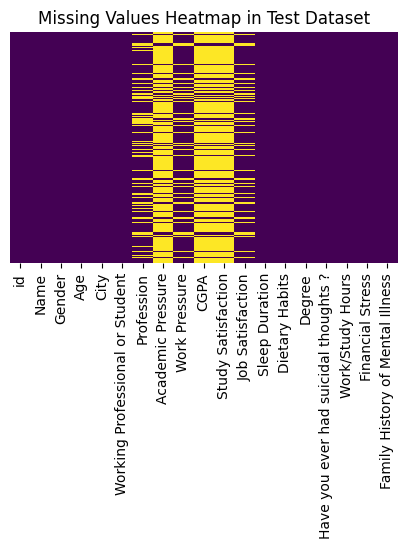

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(test)

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap in Test Dataset")
plt.show()


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [ ]:
#check how to fill missing values

In [12]:
train['Profession'].value_counts()

Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

In [55]:
train['Profession'].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

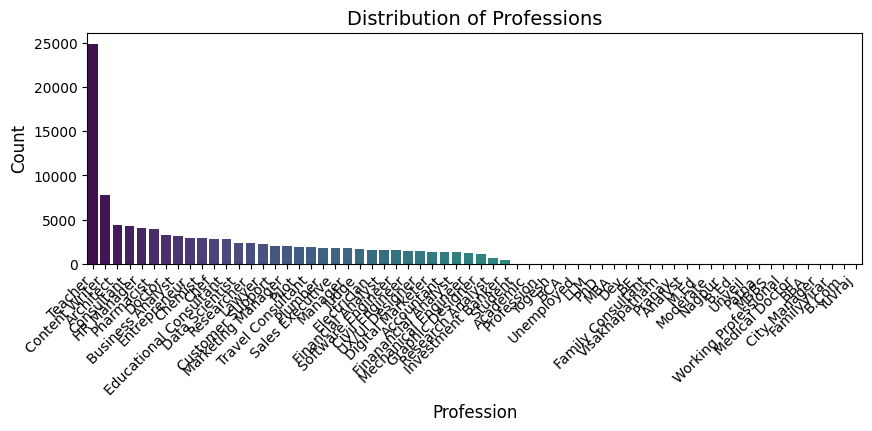

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values
profession_counts = train['Profession'].value_counts()

# Plot
plt.figure(figsize=(10, 3))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Professions", fontsize=14)

# Show the plot
plt.show()


# **Drop and Fill the missing Values in Train and Test**

In [4]:
train["is_profession_missing"] = train["Profession"].notna().astype(int)
train["is_Work_Pressure_missing"] = train["Work Pressure"].notna().astype(int)
train["is_Job_Satisfaction_missing"] = train["Job Satisfaction"].notna().astype(int)

test["is_profession_missing"] = test["Profession"].notna().astype(int)
test["is_Work_Pressure_missing"] = test["Work Pressure"].notna().astype(int)
test["is_Job_Satisfaction_missing"] = test["Job Satisfaction"].notna().astype(int)

In [5]:
train["Profession"].fillna("Unknown", inplace=True)
train["Work Pressure"].fillna(-1, inplace=True)
train["Job Satisfaction"].fillna(-1, inplace=True)

test["Profession"].fillna("Unknown", inplace=True)
test["Work Pressure"].fillna(-1, inplace=True)
test["Job Satisfaction"].fillna(-1, inplace=True)


<ipython-input-5-d34e18e7fc05>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Profession"].fillna("Unknown", inplace=True)
<ipython-input-5-d34e18e7fc05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [6]:
train["Degree"].fillna(train["Degree"].mode()[0], inplace=True)
train["Financial Stress"].fillna(train["Financial Stress"].mode()[0], inplace=True)
train["Dietary Habits"].fillna(train["Dietary Habits"].mode()[0], inplace=True)

test["Degree"].fillna(train["Degree"].mode()[0], inplace=True)
test["Financial Stress"].fillna(train["Financial Stress"].mode()[0], inplace=True)
test["Dietary Habits"].fillna(train["Dietary Habits"].mode()[0], inplace=True)



<ipython-input-6-0b3c4d82254d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Degree"].fillna(train["Degree"].mode()[0], inplace=True)
<ipython-input-6-0b3c4d82254d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [7]:
train.drop(["Academic Pressure", "CGPA",'Study Satisfaction'], axis=1, inplace=True)
test.drop(["Academic Pressure", "CGPA",'Study Satisfaction'], axis=1, inplace=True)


In [9]:
test.isnull().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
is_profession_missing                    0
is_Work_Pressure_missing                 0
is_Job_Satisfaction_missing              0
dtype: int64

In [6]:
train['Profession'].value_counts()

Profession
Unknown              36630
Teacher              24906
Content Writer        7814
Architect             4370
Consultant            4229
                     ...  
Dev                      1
BE                       1
B.Com                    1
Family Consultant        1
Yuvraj                   1
Name: count, Length: 65, dtype: int64

In [8]:
train['Work Pressure'].value_counts()

Work Pressure
-1.0    27918
 2.0    24373
 4.0    22512
 5.0    22436
 3.0    21899
 1.0    21562
Name: count, dtype: int64

In [12]:
train['Degree'].value_counts()

Degree
Class 12    14731
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64

In [9]:
train["is_profession_missing"].head()

0    1
1    1
2    0
3    1
4    1
Name: is_profession_missing, dtype: int64

In [18]:
train['Work Pressure'].value_counts()

Work Pressure
2.0    24373
4.0    22512
5.0    22436
3.0    21899
1.0    21562
Name: count, dtype: int64

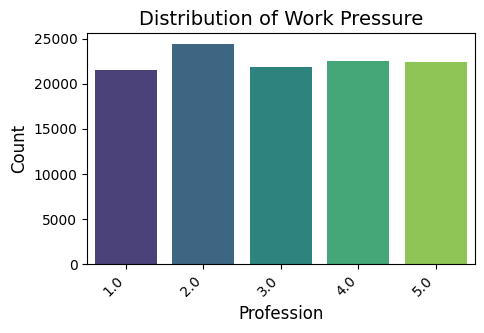

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values
profession_counts = train['Work Pressure'].value_counts()

# Plot
plt.figure(figsize=(5, 3))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Work Pressure", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Work Pressure", fontsize=14)

# Show the plot
plt.show()


In [43]:
train["Job Satisfaction"].value_counts()

Job Satisfaction
2.0    24783
5.0    22812
1.0    22324
3.0    21951
4.0    20920
Name: count, dtype: int64

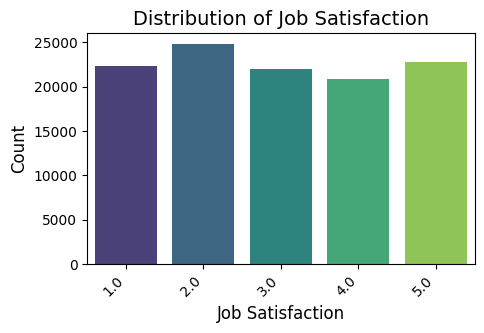

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values
profession_counts = train['Job Satisfaction'].value_counts()

# Plot
plt.figure(figsize=(5, 3))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Job Satisfaction", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Job Satisfaction", fontsize=14)

# Show the plot
plt.show()


In [45]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for the two categorical columns
contingency_table = pd.crosstab(train["Work Pressure"], train["Job Satisfaction"])

# Apply the Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value to check for significant relationship
print(f"Chi-square p-value: {p}")

# If p-value < 0.05, then there's a significant relationship between the two columns
if p < 0.05:
    print("There is a significant relationship between the two categorical columns.")
else:
    print("There is no significant relationship between the two categorical columns.")


Chi-square p-value: 5.173933957427527e-95
There is a significant relationship between the two categorical columns.


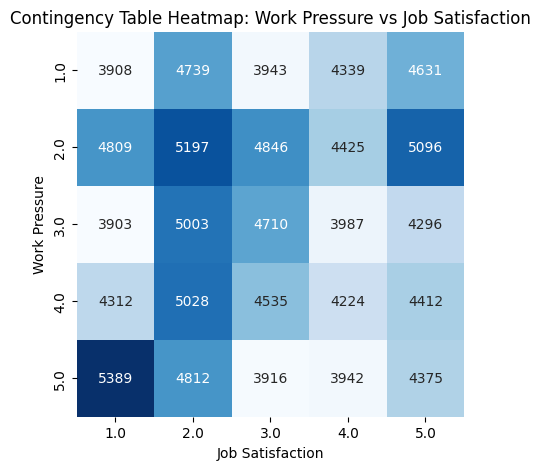

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the contingency table
contingency_table = pd.crosstab(train["Work Pressure"], train["Job Satisfaction"])

# Plot the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", cbar=False)

# Add labels and title
plt.title("Contingency Table Heatmap: Work Pressure vs Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Work Pressure")

# Show the plot
plt.show()


In [49]:
job_satisfaction_mean = train.groupby("Work Pressure")["Job Satisfaction"].mean()
train["Avg_Job_Satisfaction"] = train["Work Pressure"].map(job_satisfaction_mean)


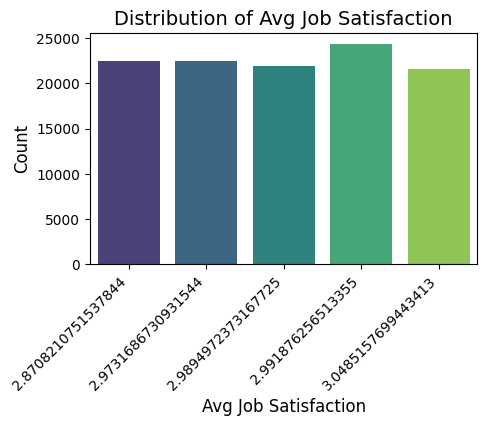

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values
profession_counts = train['Avg_Job_Satisfaction'].value_counts()

# Plot
plt.figure(figsize=(5, 3))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Avg Job Satisfaction", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Avg Job Satisfaction", fontsize=14)

# Show the plot
plt.show()

In [58]:
train["Degree"]

0              BHM
1              LLB
2          B.Pharm
3              BBA
4              BBA
            ...   
140695    Class 12
140696      B.Tech
140697       B.Com
140698          ME
140699         BCA
Name: Degree, Length: 140700, dtype: object

In [54]:
train["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

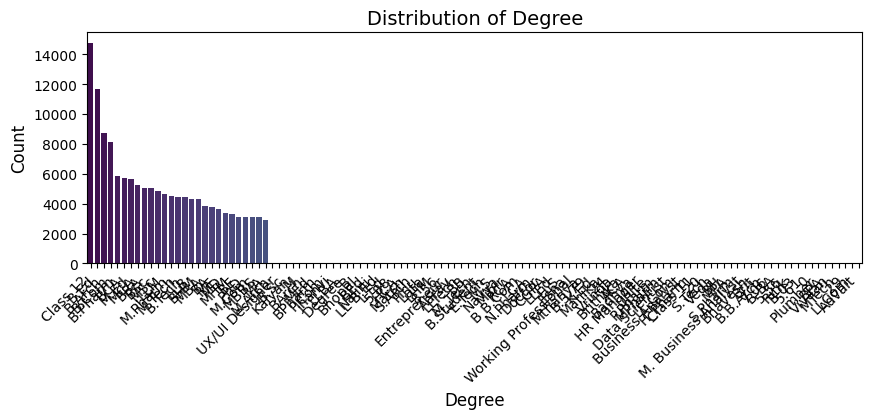

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values
profession_counts = train['Degree'].value_counts()

# Plot
plt.figure(figsize=(10, 3))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Degree", fontsize=14)

# Show the plot
plt.show()

In [59]:
education_map = {
    "High School": ["Class 11", "Class 12"],
    "Diploma": ["B.Ed", "B.P.Ed", "L.Ed", "LCA", "RCA", "HCA", "N.Pharm", "S.Pharm"],
    "Bachelor's": [
        "B.Tech", "BE", "BSc", "B.Sc", "B.Arch", "B.B.Arch", "BBA", "B.Com", "B.Ed", "BCA", 
        "B.Pharm", "BPharm", "BPA", "BHM", "B Student"
    ],
    "Master's": [
        "M.Tech", "M_Tech", "MTech", "ME", "MSc", "MBA", "M.Com", "M.Ed", "MPharm", "M.Pharm", 
        "MPA", "MHM", "M.Arch", "M.S", "M. Business Analyst"
    ],
    "Doctorate": ["PhD", "MD", "MBBS"],
    "Law": ["LLB", "LLBA", "LLM", "LL.Com", "LLCom", "LL B.Ed", "LLS", "LLEd"],
    "Other": [
        "Plumber", "Entrepreneur", "Working Professional", "Data Scientist", 
        "HR Manager", "UX/UI Designer", "Business Analyst", "Doctor"
    ]
    
}

def map_education(value):
    for category, degrees in education_map.items():
        if value in degrees:
            return category
    return "Unknown"

train["Education Level"] = train["Degree"].apply(map_education)


In [60]:
train["Education Level"]

0          Bachelor's
1                 Law
2          Bachelor's
3          Bachelor's
4          Bachelor's
             ...     
140695    High School
140696     Bachelor's
140697     Bachelor's
140698       Master's
140699     Bachelor's
Name: Education Level, Length: 140700, dtype: object

In [63]:
train["Education Level"].value_counts()

Education Level
Bachelor's     50348
Master's       33400
High School    14730
Unknown        11942
Diploma        11698
Doctorate       9568
Law             9003
Other             11
Name: count, dtype: int64

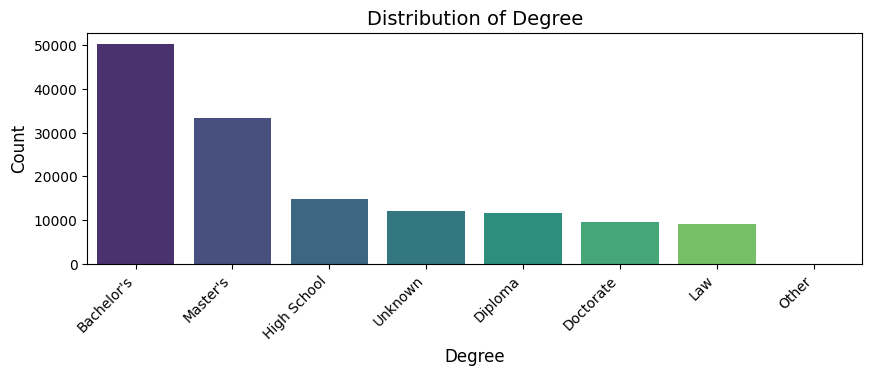

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values
profession_counts = train['Education Level'].value_counts()

# Plot
plt.figure(figsize=(10, 3))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='viridis')

# Labels & Title
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Distribution of Degree", fontsize=14)

# Show the plot
plt.show()

# **Is there any Data Inconsistencies**

In [15]:
test["Dietary Habits"].unique()

array(['Moderate', 'Healthy', 'Unhealthy', 'More Healthy', 'No', 'Indoor',
       'Prachi', nan, 'Male', 'Less Healthy', 'Mealy', 'Resistant', 'MCA',
       '5 Healthy', 'Academic', 'Educational', 'Soham', '5 Unhealthy',
       'Vivaan', 'Raghav', '1.0', 'Naina', 'Kolkata'], dtype=object)

In [4]:
train["Have you ever had suicidal thoughts ?"].unique()
#train["Work/Study Hours"].unique()
#train["Family History of Mental Illness"].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
train["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [6]:
test["Degree"].unique()

array(['LLB', 'B.Ed', 'B.Arch', 'BSc', 'BCA', 'B.Com', 'MA', 'BA', 'BBA',
       'Class 12', 'MD', 'MBA', 'M.Ed', 'M.Pharm', 'BHM', 'LLM', 'PhD',
       'M.Com', 'BE', 'MBBS', 'B.Tech', 'ME', 'MCA', 'B.Pharm', 'MHM',
       'M.Tech', 'BTech', 'MSc', 'BArch', 'B. Gender', 'B.Study_Hours',
       'Advait', 'M.Arch', 'A.Ed', 'Mechanical Engineer', 'B.H', 'B.Sc',
       'B', 'M.UI', 'Vibha', 'B BCA', 'B.Press', 'BPharm', 'Gagan',
       'MPharm', 'Travel Consultant', '5.65', 'Business Analyst',
       'Eshita', 'B_Com', 'Navya', 'B._Pharm', 'Pune', 'Bian', 'B.M.Com',
       'Kavya', 'M.M.Ed', 'S.Pharm', 'Vrinda', 'M', 'E.Ed', '3.0',
       'Moham', 'B.BA', nan, 'I.Ed', 'Degree', 'Magan', 'B B.Tech',
       'M.B.Ed', 'Bhopal', 'B Financial Analyst', 'GCA', 'G.Ed', 'Rupak',
       'RCA', 'B.CA', 'PCA', 'J.Ed', 'BH', 'BEd', '8.95', 'Aadhya', '20',
       'Banchal', 'M.', 'K.Ed', 'BHCA'], dtype=object)

In [88]:
train["Family History of Mental Illness"].unique()

array(['No', 'Yes'], dtype=object)

# **Univariate Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


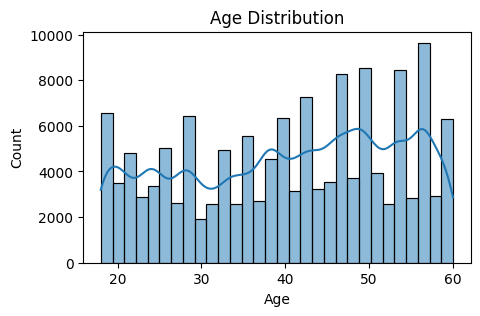

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.histplot(train["Age"], bins=30, kde=True)  # kde=True adds a density curve
plt.title("Age Distribution")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


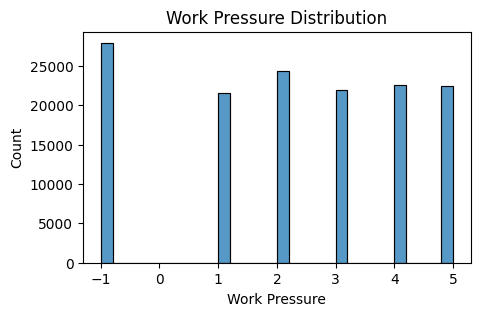

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.histplot(train["Work Pressure"], bins=30)  
plt.title("Work Pressure Distribution")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


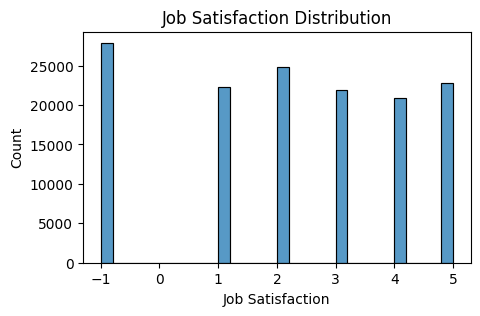

In [23]:
#Job Satisfaction
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.histplot(train["Job Satisfaction"], bins=30)  
plt.title("Job Satisfaction Distribution")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


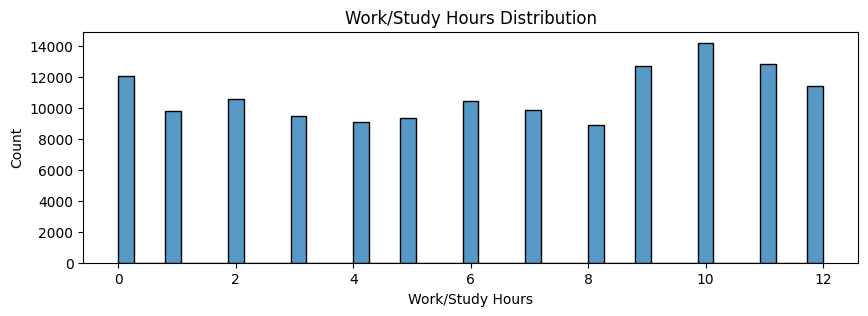

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,3))
sns.histplot(train["Work/Study Hours"])  
plt.title("Work/Study Hours Distribution")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


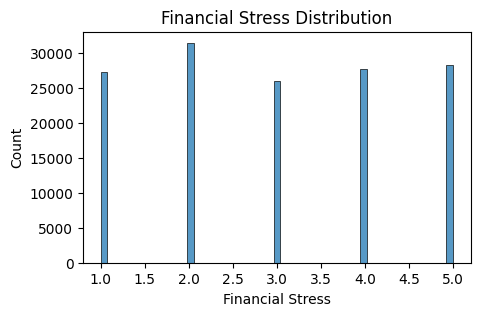

In [28]:
#Financial Stress
import seaborn as sns

plt.figure(figsize=(5,3))
sns.histplot(train["Financial Stress"])  
plt.title("Financial Stress Distribution")
plt.show()

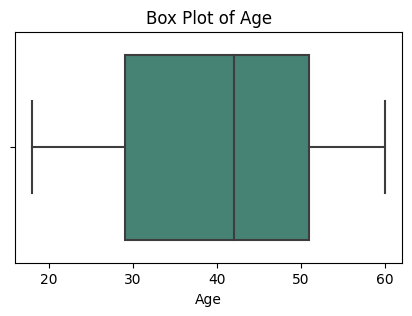

In [33]:
plt.figure(figsize=(5,3))
sns.boxplot(x=train["Age"],color='#3D8D7A')
plt.title("Box Plot of Age")
plt.show()


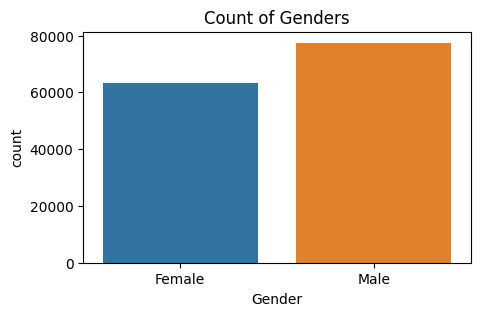

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.countplot(x=train["Gender"])
plt.title("Count of Genders")
plt.show()


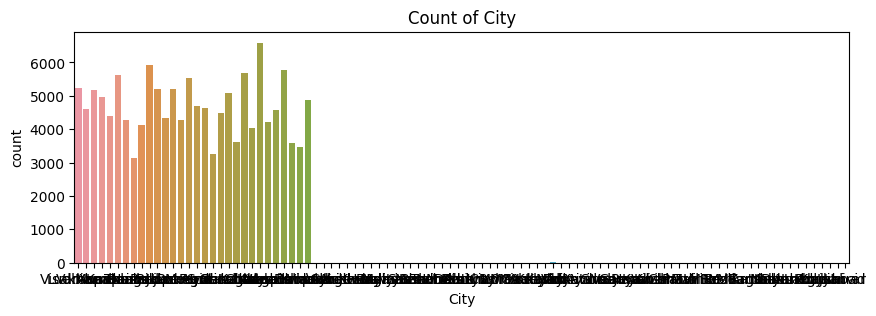

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,3))
sns.countplot(x=train["City"])
plt.title("Count of City")
plt.show()


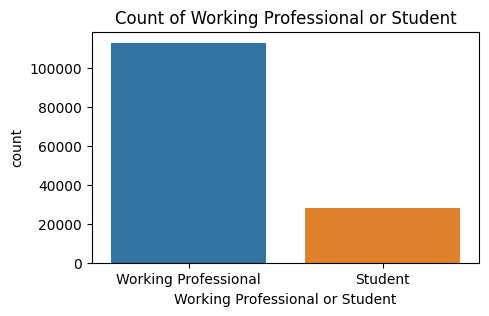

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.countplot(x=train["Working Professional or Student"])
plt.title("Count of Working Professional or Student")
plt.show()

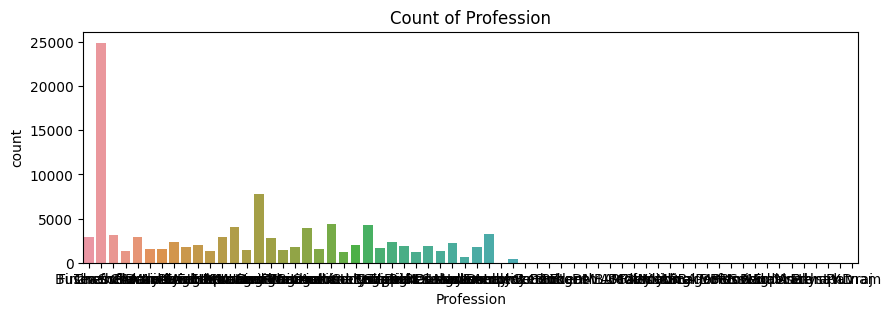

In [13]:
#Profession
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,3))
sns.countplot(x=train["Profession"])
plt.title("Count of Profession")
plt.show()

In [15]:
train["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

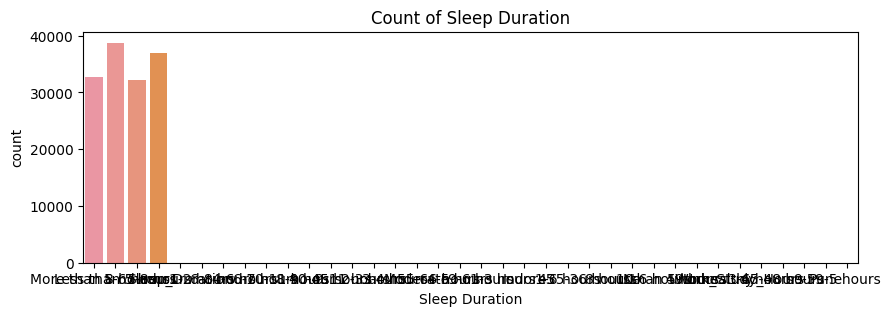

In [14]:
#Sleep Duration','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,3))
sns.countplot(x=train["Sleep Duration"])
plt.title("Count of Sleep Duration")
plt.show()

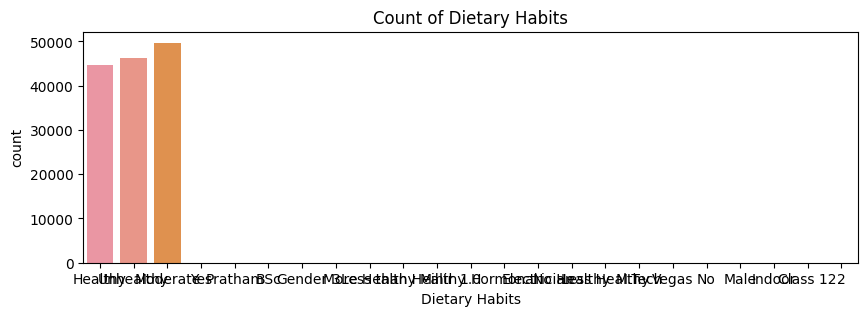

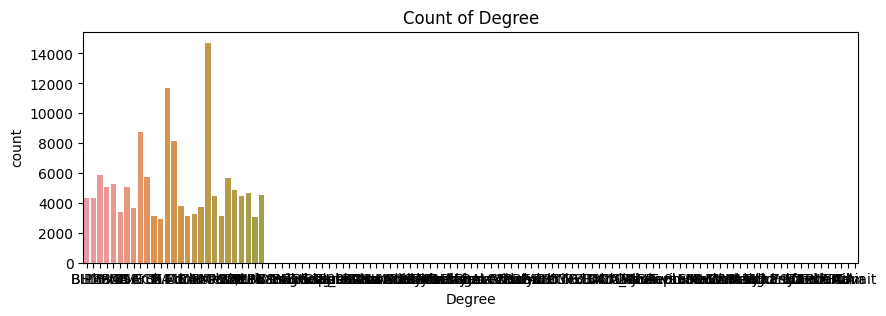

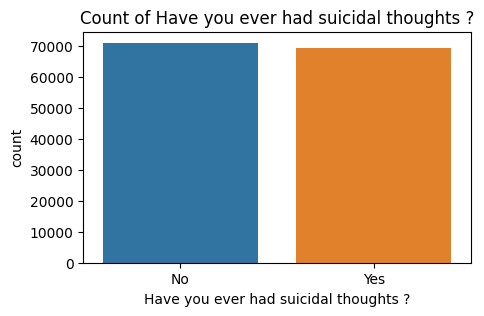

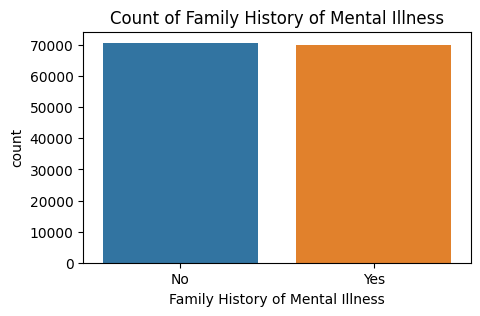

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,3))
sns.countplot(x=train["Dietary Habits"])
plt.title("Count of Dietary Habits")
plt.show()

plt.figure(figsize=(10,3))
sns.countplot(x=train["Degree"])
plt.title("Count of Degree")
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(x=train["Have you ever had suicidal thoughts ?"])
plt.title("Count of Have you ever had suicidal thoughts ?")
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(x=train["Family History of Mental Illness"])
plt.title("Count of Family History of Mental Illness")
plt.show()


# **Bivariate and MultiVariate Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, "'Age' distribution")]

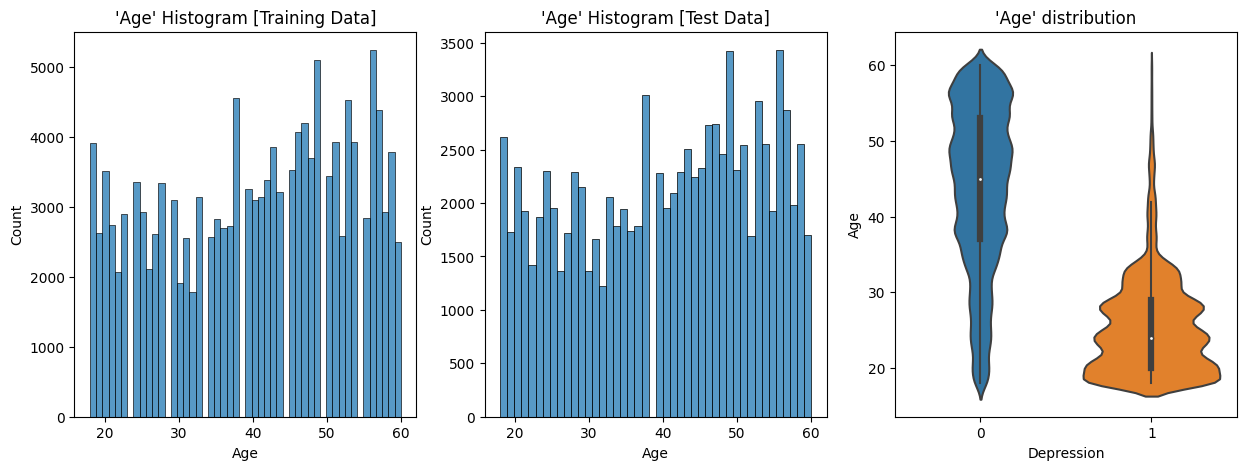

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(data=train, x='Age', ax=ax1)
ax1.set(title="'Age' Histogram [Training Data]") 
sns.histplot(data=test, x='Age', ax=ax2)
ax2.set(title="'Age' Histogram [Test Data]") 
sns.violinplot(
    data=train, x='Depression', y='Age', fill=False, ax=ax3
)
ax3.set(title="'Age' distribution")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

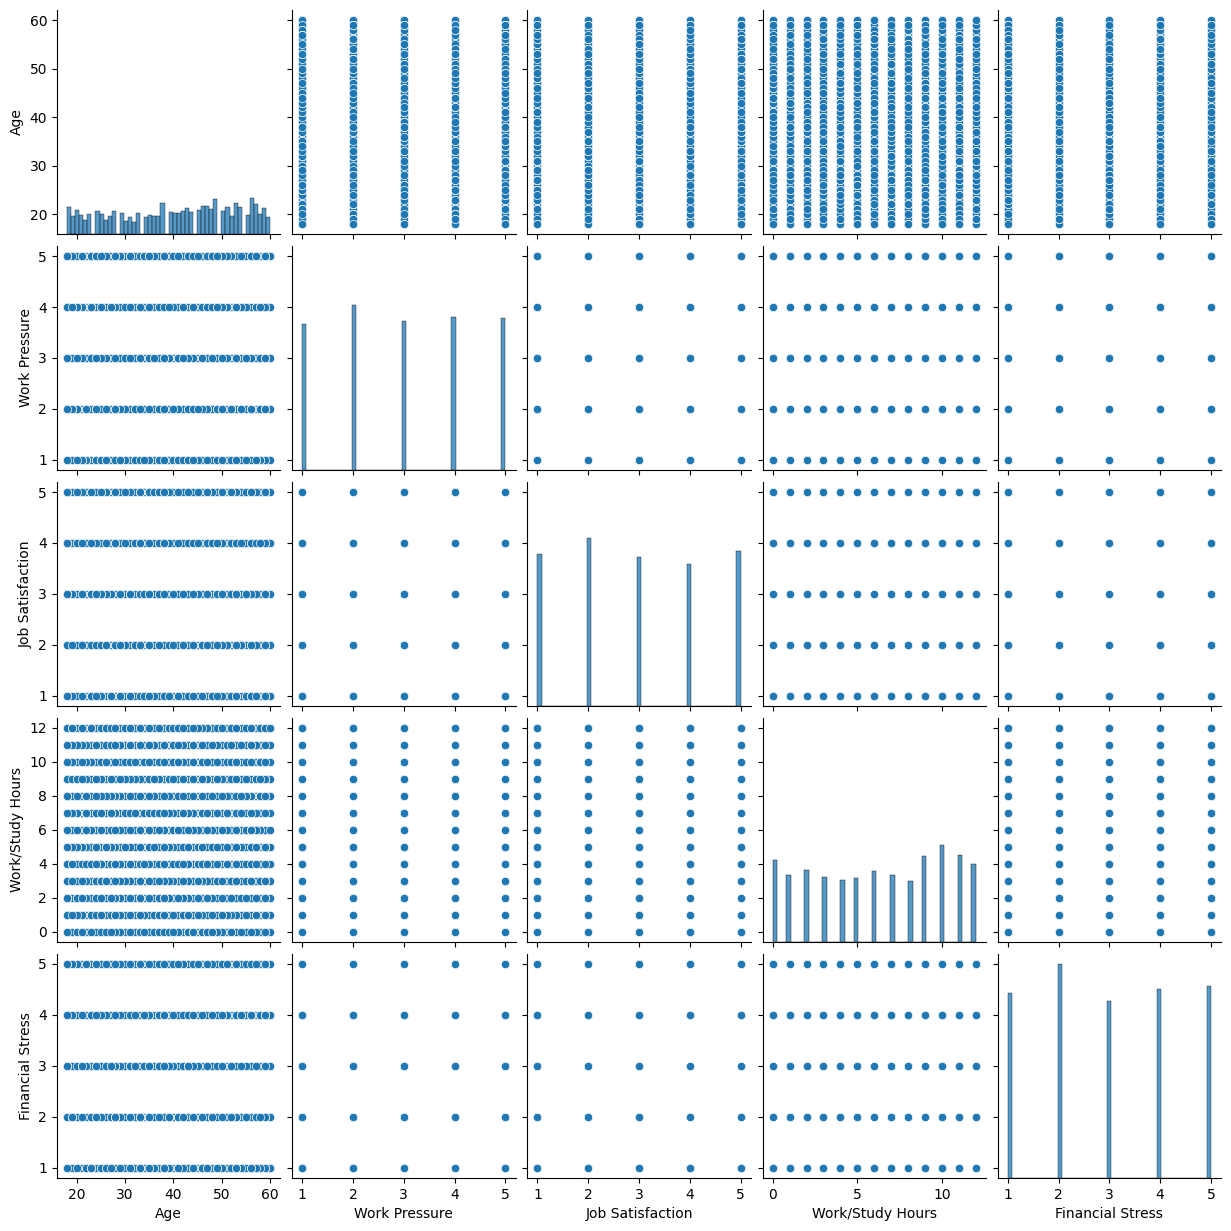

In [19]:
sns.pairplot(train_numerical)

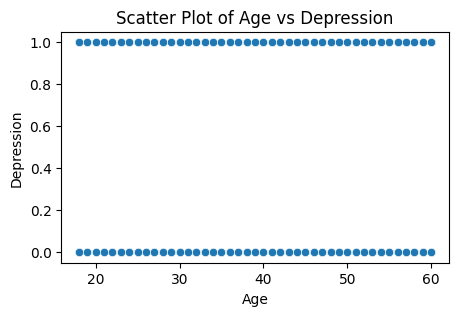

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter(data, col1, col2):
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=train[col1], y=train[col2])
    plt.title(f"Scatter Plot of {col1} vs {col2}")
    plt.show()

# Example: Relationship between Age and Salary
plot_scatter(train, "Age", "Depression")


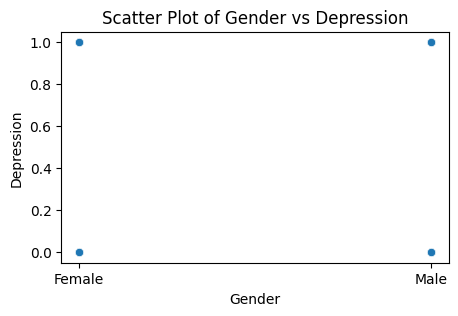

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter(data, col1, col2):
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=train[col1], y=train[col2])
    plt.title(f"Scatter Plot of {col1} vs {col2}")
    plt.show()

# Example: Relationship between Age and Salary
plot_scatter(train, "Gender", "Depression")

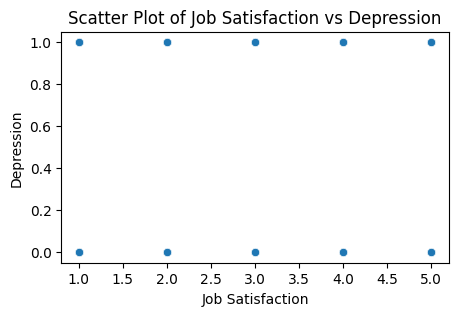

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter(data, col1, col2):
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=train[col1], y=train[col2])
    plt.title(f"Scatter Plot of {col1} vs {col2}")
    plt.show()

# Example: Relationship between Age and Salary
plot_scatter(train, "Job Satisfaction", "Depression")

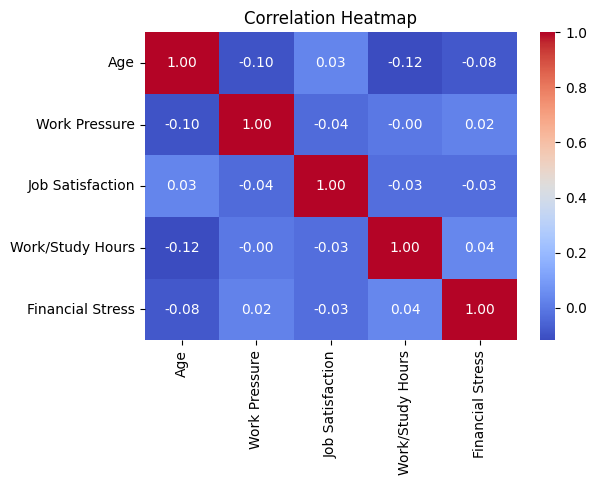

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(train_numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


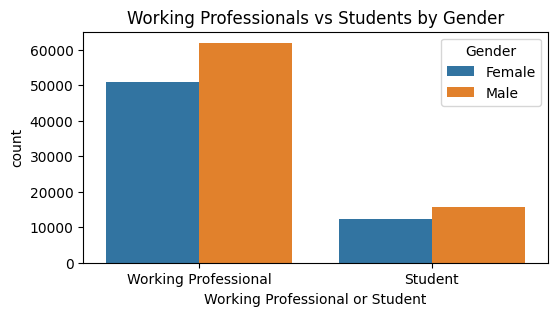

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
sns.countplot(x="Working Professional or Student", hue="Gender", data=train)
plt.title("Working Professionals vs Students by Gender")
plt.show()


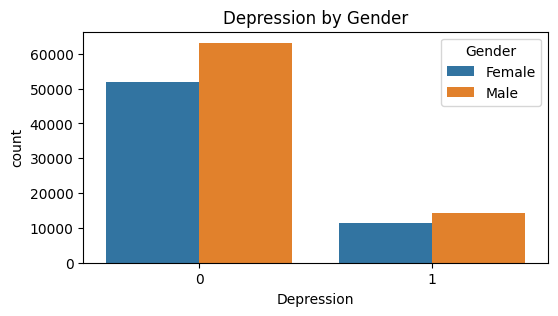

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
sns.countplot(x="Depression", hue="Gender", data=train)
plt.title("Depression by Gender")
plt.show()

# **Target Variable**

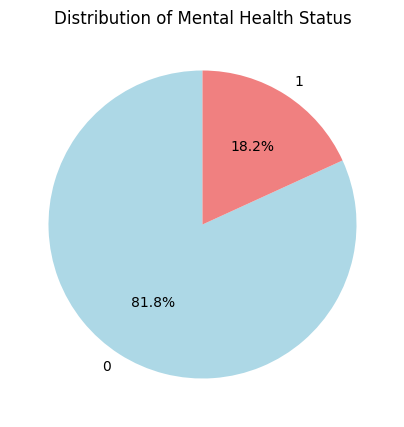

In [22]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
target_counts = train["Depression"].value_counts()

# Plot pie chart
plt.figure(figsize=(5,5))
plt.pie(target_counts, labels=target_counts.index, autopct="%1.1f%%", startangle=90, colors=["lightblue", "lightcoral", "lightgreen"])
plt.title("Distribution of Mental Health Status")
plt.show()
